<a href="https://colab.research.google.com/github/vvilliscool/ML_LIB_Class_Goorm/blob/master/goorm_20220726.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

Unknown System


In [2]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 4.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=1f5da2f6eb9322a058a40dfc52f3a2918e4e1352ff84852a7b588b6c562b43b5
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


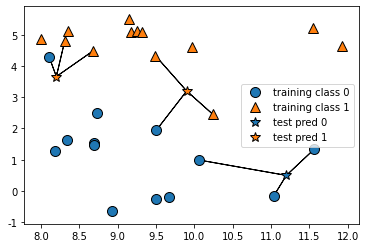

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


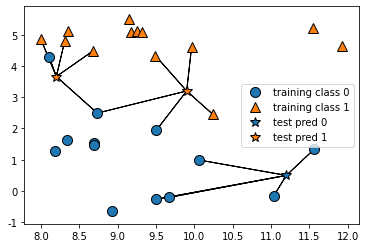

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

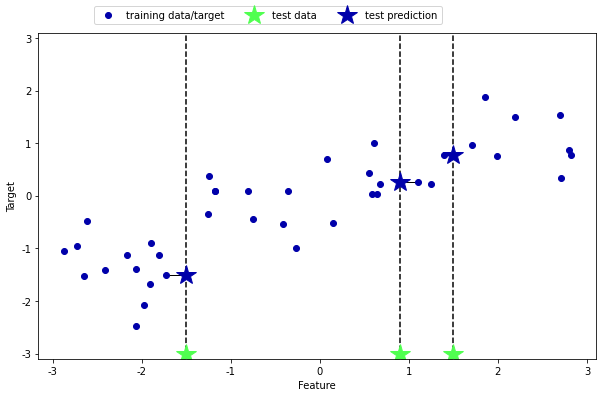

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

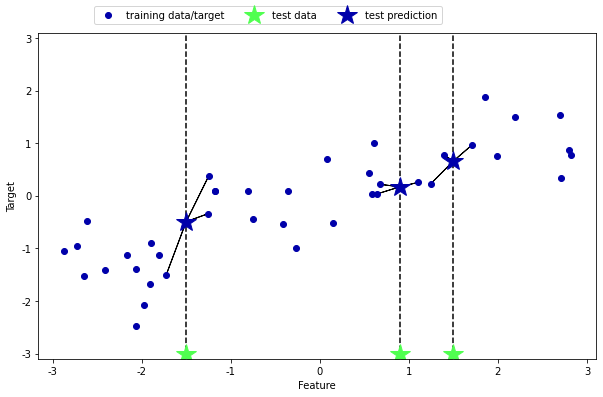

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                             random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50883 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_te

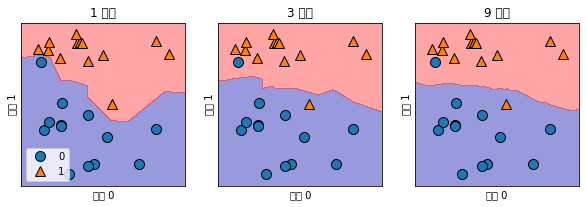

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    model = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(model, X, 
                                    fill=True, eps=0.5, ax=ax, alpha=.4)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

## 유방암 데이터 셋 실습


In [11]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [12]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행열 : (569, 30)


In [13]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]


#### 데이터셋 나누기

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                         stratify=cancer.target,     
                                         random_state=77)

In [16]:
print( len(y_train) )
y_1_all = (y == 1).sum() 
y_0_all =  (y == 0).sum() 

print(f"target y의 \n 0의 개수 : {y_0_all} \n 1의 개수 : {y_1_all}")

426
target y의 
 0의 개수 : 212 
 1의 개수 : 357


In [17]:
y_train_1 = (y_train == 1).sum()
y_test_1 = (y_test == 1).sum()

y_train_0 = len(y_train) - (y_train == 1).sum()
y_test_0 = len(y_test) - (y_test == 1).sum()

print("데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서")
print(f"train비율 : {y_train_1/y_1_all}, test비율 : {y_test_1/y_1_all}")

print("데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서")
print(f"train비율 : {y_train_0/y_0_all}, test비율 : {y_test_0/y_0_all}")

데이터 셋의 target(학습:테스트)의 비율 - 1에 대해서
train비율 : 0.7478991596638656, test비율 : 0.25210084033613445
데이터 셋의 target(학습:테스트)의 비율 - 0에 대해서
train비율 : 0.75, test비율 : 0.25


#### 머신러닝 모델 만들고 예측하기

작업 단계
- (1) 모델 만들기
- (2) 모델 학습 시키기(fit)
- (3) 모델을 이용한 값 예측(predict)
- (4) 훈련 데이터를 이용한 정확도 확인
- (5) 테스트 데이터를 이용한 정확도 확인

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [20]:
# 예측 후, 정확도 구하기
(pred == y_test).sum()/(len(pred))

0.9090909090909091

In [21]:
acc_tr = model.score(X_train, y_train)   # 정확도(학습용 데이터)
acc_test = model.score(X_test, y_test)   # 정확도(테스트 데이터)
acc_tr, acc_test

(0.9553990610328639, 0.9090909090909091)

In [22]:
print("k : {}".format(3))
print("훈련 데이터셋 정확도 : {:.2f}".format(acc_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(acc_test))

k : 3
훈련 데이터셋 정확도 : 0.96
테스트 데이터 셋 정확도 : 0.91


In [23]:
k_list = []
tr_acc = []
test_acc = []
k_nums = range(1, 22, 2)# 1,3,5~21

for n in k_nums:
    # 모델 선택 및 학습 
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    
    # 정확도 구하기 
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    
    # 정확도 값 저장.
    k_list.append(n)
    tr_acc.append(acc_tr)
    test_acc.append(acc_test)
    
    print("k : ", n)
    print("학습용셋 정확도 {:.3f}".format(acc_tr) )
    print("테스트용셋 정확도 {:.3f}".format(acc_test) )

k :  1
학습용셋 정확도 1.000
테스트용셋 정확도 0.888
k :  3
학습용셋 정확도 0.955
테스트용셋 정확도 0.909
k :  5
학습용셋 정확도 0.953
테스트용셋 정확도 0.916
k :  7
학습용셋 정확도 0.953
테스트용셋 정확도 0.909
k :  9
학습용셋 정확도 0.946
테스트용셋 정확도 0.909
k :  11
학습용셋 정확도 0.939
테스트용셋 정확도 0.909
k :  13
학습용셋 정확도 0.937
테스트용셋 정확도 0.916
k :  15
학습용셋 정확도 0.939
테스트용셋 정확도 0.916
k :  17
학습용셋 정확도 0.934
테스트용셋 정확도 0.923
k :  19
학습용셋 정확도 0.937
테스트용셋 정확도 0.923
k :  21
학습용셋 정확도 0.934
테스트용셋 정확도 0.923


### 시각화

In [24]:
import seaborn as sns
print(sns.__version__)

0.11.2


In [25]:
# tr_acc = []
# test_acc = []
dat = { "tr_acc":tr_acc, "test_acc":test_acc }
data_df = pd.DataFrame(dat, index=k_list)
data_df

,tr_acc,test_acc
1,1.000000,0.888112
3,0.955399,0.909091
5,0.953052,0.916084
7,0.953052,0.909091
9,0.946009,0.909091
11,0.938967,0.909091
13,0.936620,0.916084
15,0.938967,0.916084
17,0.934272,0.923077
19,0.936620,0.923077


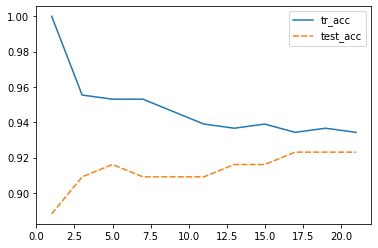

In [26]:
sns.lineplot(data=data_df, palette="tab10")
plt.show()

Text(0, 0.5, 'knn - accuracy')

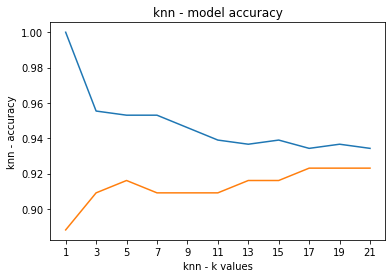

In [27]:
import matplotlib.pyplot as plt

plt.plot(k_nums, tr_acc, '-')
plt.plot(k_nums, test_acc, '-')
plt.xticks(k_nums)                # x축 지정

# 제목, x축, y축 레이블
plt.title("knn - model accuracy")
plt.xlabel("knn - k values")
plt.ylabel("knn - accuracy")